In [2]:
import os

In [3]:
with open('../experiment_data/Random_Dict_Sparse+RandomSeed/PubMed_result.txt', 'r') as file:
    lines = file.readlines()

In [4]:
import json

array = []

for line1, line2 in zip(lines[::2], lines[1::2]):
    print(line1)
    print(line2)
    sparse = line1.split('/')[1].split('_')[-1]
    seed = line1.split('/')[2].split('_')[-1]
    start_index = line2.find('After finetune subnet ')
    print(line2[start_index+len('After finetune subnet '):])
    result = json.loads(line2[start_index+len('After finetune subnet '):])
    result['seed'] = int(seed)
    result['sparse'] = float(sparse)
    array.append(result)

# for line in :
#     print(line)



==> ./sparse_0.001/seed_0/Finetune_Base/log.train.default.01231525 <==

[2022-01-23 15:42:07,829][snae_cora_solver.py][line: 575][    INFO] After finetune subnet {"subnet_settings": {"genotype_filename": "../results/searched_result.txt", "hidden_size": 64, "in_dropout": 0.5, "out_dropout": 0.5, "act": "relu", "config": {"fix_last": true, "with_linear": false, "with_layernorm": false}, "genotype": "sage||sage_max||sage_max||none||none||none||l_concat"}, "top1_val": 86.482, "top1_test": 87.088, "best_top1_val": 87.37002333012121, "best_top1_test": 86.88482654562053}

{"subnet_settings": {"genotype_filename": "../results/searched_result.txt", "hidden_size": 64, "in_dropout": 0.5, "out_dropout": 0.5, "act": "relu", "config": {"fix_last": true, "with_linear": false, "with_layernorm": false}, "genotype": "sage||sage_max||sage_max||none||none||none||l_concat"}, "top1_val": 86.482, "top1_test": 87.088, "best_top1_val": 87.37002333012121, "best_top1_test": 86.88482654562053}

==> ./sparse_0.001

In [5]:
len(array)

36

In [6]:
import pandas as pd
df = pd.DataFrame(array)

In [7]:
def add_genotype(x):
    subnet = x['subnet_settings']
    x['genotype'] = subnet['genotype'].replace('||none||none||none||l_concat', '')
    x['Test_Acc'] = x['best_top1_test']
    return x

In [8]:
df = df.apply(add_genotype, axis=1)

In [9]:
df

subnet_settings  top1_val  top1_test  \
0   {'genotype_filename': '../results/searched_res...    86.482     87.088   
1   {'genotype_filename': '../results/searched_res...    88.106     89.016   
2   {'genotype_filename': '../results/searched_res...    87.091     87.925   
3   {'genotype_filename': '../results/searched_res...    84.225     84.678   
4   {'genotype_filename': '../results/searched_res...    86.812     86.961   
5   {'genotype_filename': '../results/searched_res...    87.725     87.595   
6   {'genotype_filename': '../results/searched_res...    87.015     88.229   
7   {'genotype_filename': '../results/searched_res...    85.747     86.352   
8   {'genotype_filename': '../results/searched_res...    86.685     87.062   
9   {'genotype_filename': '../results/searched_res...    87.015     88.229   
10  {'genotype_filename': '../results/searched_res...    86.356     86.783   
11  {'genotype_filename': '../results/searched_res...    88.156     88.661   
12  {'genotype_filename': '../results/searched_res...    86.888     87.164   
13  {'genotype_filename': '../results/searched_res...    86.279     86.251   
14  {'genotype_filename': '../results/searched_res...    86.787     87.189   
15  {'genotype_filename': '../results/searched_res...    87.370     87.697   
16  {'genotype_filename': '../results/searched_res...    87.446     86.885   
17  {'genotype_filename': '../results/searched_res...    85.924     86.428   
18  {'genotype_filename': '../results/searched_res...    86.990     86.707   
19  {'genotype_filename': '../results/searched_res...    85.747     86.352   
20  {'genotype_filename': '../results/searched_res...    87.598     87.443   
21  {'genotype_filename': '../results/searched_res...    85.062     85.312   
22  {'genotype_filename': '../results/searched_res...    86.457     87.012   
23  {'genotype_filename': '../results/searched_res...    87.725     87.595   
24  {'genotype_filename': '../results/searched_res...    87.801     88.001   
25  {'genotype_filename': '../results/searched_res...    88.689     89.016   
26  {'genotype_filename': '../results/searched_res...    87.725     88.280   
27  {'genotype_filename': '../results/searched_res...    87.015     88.229   
28  {'genotype_filename': '../results/searched_res...    87.446     86.885   
29  {'genotype_filename': '../results/searched_res...    87.497     87.925   
30  {'genotype_filename': '../results/searched_res...    87.801     88.001   
31  {'genotype_filename': '../results/searched_res...    87.750     87.773   
32  {'genotype_filename': '../results/searched_res...    86.812     86.758   
33  {'genotype_filename': '../results/searched_res...    87.015     87.747   
34  {'genotype_filename': '../results/searched_res...    87.015     87.392   
35  {'genotype_filename': '../results/searched_res...    88.182     88.686   

    best_top1_val  best_top1_test  seed  sparse  \
0       87.370023       86.884827     0   0.001   
1       88.485926       89.167939     1   0.001   
2       87.293941       87.696601     2   0.001   
3       84.656356       84.677829     3   0.001   
4       87.065692       87.037043     4   0.001   
5       87.851892       87.493660     5   0.001   
6       87.217858       87.595134     0   0.010   
7       86.051231       86.225262     1   0.010   
8       86.837431       87.011671     2   0.010   
9       87.217858       87.595134     3   0.010   
10      86.609182       86.757988     4   0.010   
11      88.409843       88.533740     5   0.010   
12      86.989603       87.214612     0   0.100   
13      86.482376       86.098424     1   0.100   
14      87.116410       87.011671     2   0.100   
15      87.496836       87.848811     3   0.100   
16      87.750444       87.290720     4   0.100   
17      86.228762       87.087773     5   0.100   
18      87.243217       86.884827     0   0.000   
19      86.051231       86.225262     1   0.000   
20      87.649002       87.341457     2   0.000   
21      85.341108       85.13

In [10]:
grouped = df.groupby('seed')

In [11]:
import numpy as np
def sort(x):
    x = x.sort_values(by='Test_Acc', ascending=False)
    return x.head(1)

d = grouped.apply(sort)

In [12]:
d

subnet_settings  top1_val  \
seed                                                                   
0    24  {'genotype_filename': '../results/searched_res...    87.801   
1    1   {'genotype_filename': '../results/searched_res...    88.106   
2    26  {'genotype_filename': '../results/searched_res...    87.725   
3    15  {'genotype_filename': '../results/searched_res...    87.370   
4    34  {'genotype_filename': '../results/searched_res...    87.015   
5    35  {'genotype_filename': '../results/searched_res...    88.182   

         top1_test  best_top1_val  best_top1_test  seed  sparse  \
seed                                                              
0    24     88.001      87.851892       88.051751     0  10.000   
1    1      89.016      88.485926       89.167939     1   0.001   
2    26     88.280      87.978699       88.026380     2  10.000   
3    15     87.697      87.496836       87.848811     3   0.100   
4    34     87.392      87.217858       87.493660     4   1.000   
5    35     88.686      88.384478       88.635207     5   1.000   

                                         genotype   Test_Acc  
seed                                                          
0    24                        gcn||mlp||sage_max  88.051751  
1    1                      sage||gin_0||sage_max  89.167939  
2    26                   sage||gat_cos||sage_max  88.026380  
3    15  gat_sym||gat_cos||gat_generalized_linear  87.848811  
4    34         gat_generalized_linear||gat||sage  87.493660  
5    35          gat_linear||geniepath||geniepath  88.635207

In [13]:
grouped = df.groupby('sparse')

In [14]:
import numpy as np
def sort(x):
    x = x.sort_values(by='Test_Acc', ascending=False)
    return x.head(1)

d = grouped.apply(sort)

In [15]:
d

subnet_settings  top1_val  \
sparse                                                                   
0.000  23  {'genotype_filename': '../results/searched_res...    87.725   
0.001  1   {'genotype_filename': '../results/searched_res...    88.106   
0.010  11  {'genotype_filename': '../results/searched_res...    88.156   
0.100  15  {'genotype_filename': '../results/searched_res...    87.370   
1.000  35  {'genotype_filename': '../results/searched_res...    88.182   
10.000 25  {'genotype_filename': '../results/searched_res...    88.689   

           top1_test  best_top1_val  best_top1_test  seed  sparse  \
sparse                                                              
0.000  23     87.595      87.851892       87.493660     5   0.000   
0.001  1      89.016      88.485926       89.167939     1   0.001   
0.010  11     88.661      88.409843       88.533740     5   0.010   
0.100  15     87.697      87.496836       87.848811     3   0.100   
1.000  35     88.686      88.384478       88.635207     5   1.000   
10.000 25     89.016      88.790263       88.990364     1  10.000   

                                           genotype   Test_Acc  
sparse                                                          
0.000  23                       gat_cos||gin_0||gat  87.493660  
0.001  1                      sage||gin_0||sage_max  89.167939  
0.010  11                      mlp||gin_0||sage_max  88.533740  
0.100  15  gat_sym||gat_cos||gat_generalized_linear  87.848811  
1.000  35          gat_linear||geniepath||geniepath  88.635207  
10.000 25                        sage||gin_0||gin_0  88.990364

In [16]:
simplified_df = df[['seed', 'sparse', 'Test_Acc']]

In [17]:
simplified_df

seed  sparse   Test_Acc
0      0   0.001  86.884827
1      1   0.001  89.167939
2      2   0.001  87.696601
3      3   0.001  84.677829
4      4   0.001  87.037043
5      5   0.001  87.493660
6      0   0.010  87.595134
7      1   0.010  86.225262
8      2   0.010  87.011671
9      3   0.010  87.595134
10     4   0.010  86.757988
11     5   0.010  88.533740
12     0   0.100  87.214612
13     1   0.100  86.098424
14     2   0.100  87.011671
15     3   0.100  87.848811
16     4   0.100  87.290720
17     5   0.100  87.087773
18     0   0.000  86.884827
19     1   0.000  86.225262
20     2   0.000  87.341457
21     3   0.000  85.134453
22     4   0.000  87.011671
23     5   0.000  87.493660
24     0  10.000  88.051751
25     1  10.000  88.990364
26     2  10.000  88.026380
27     3  10.000  87.595134
28     4  10.000  87.290720
29     5  10.000  87.874176
30     0   1.000  88.051751
31     1   1.000  87.899541
32     2   1.000  86.808725
33     3   1.000  87.645864
34     4   1.000  87.493660
35     5   1.000  88.635207

In [27]:
test_acc_df.columns = [0, 1, 2, 3, 4, 5]

In [28]:
test_acc_df

0          1          2          3          4          5
0.000   86.884827  89.167939  87.696601  84.677829  87.037043  87.493660
0.001   87.595134  86.225262  87.011671  87.595134  86.757988  88.533740
0.010   87.214612  86.098424  87.011671  87.848811  87.290720  87.087773
0.100   86.884827  86.225262  87.341457  85.134453  87.011671  87.493660
1.000   88.051751  88.990364  88.026380  87.595134  87.290720  87.874176
10.000  88.051751  87.899541  86.808725  87.645864  87.493660  88.635207

In [29]:
pd.Series()

/tmp/ipykernel_22258/2031691219.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [36]:
"""
Discovering structure in heatmap data
=====================================

"""
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

# Select a subset of the networks
sparse_range = pd.Index([0, 0.001, 0.01, 0.1, 1, 10], name='sparse')
seed_range =  pd.Index([0, 1, 2, 3, 4, 5], name='seed')
sparse = []
# used_columns = (simplified_df.columns.get_level_values("sparse")
#                           .isin(sparse_range))
# df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
sparse_pal = sns.husl_palette(6, s=.45)
sparse_lut = dict(zip(sparse_range, sparse_pal))

seed_pal = sns.husl_palette(6, s=.65)
seed_lut = dict(zip(seed_range, seed_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
sparse_colors = pd.Series(sparse_range, index=sparse_range).map(sparse_lut)
seed_colors = pd.Series(seed_range, index=seed_range).map(seed_lut)

In [37]:
sparse_colors

sparse
0.000     (0.8167028311697733, 0.5345122109266688, 0.575...
0.001     (0.6813276573373218, 0.6029711581968916, 0.450...
0.010     (0.47974942417114835, 0.6571819677589695, 0.44...
0.100     (0.46712078684915886, 0.6454760674453914, 0.62...
1.000     (0.4876882343131805, 0.6244361983159378, 0.773...
10.000    (0.760280987353584, 0.5328002739928382, 0.7879...
Name: sparse, dtype: object

In [38]:
seed_colors

seed
0    (0.8883320155739081, 0.4956314828874588, 0.557...
1    (0.7067645298655262, 0.5994341099460598, 0.360...
2    (0.4126873624378555, 0.674039476288347, 0.3575...
3    (0.37959946672856243, 0.6598452346737731, 0.63...
4    (0.4051440245279145, 0.6308328313229653, 0.842...
5    (0.8254607875150294, 0.48428160515921875, 0.86...
Name: seed, dtype: object

In [39]:
test_acc_df = test_acc_df[[0,1,2,3,4,5]]

In [40]:
test_acc_df[2]

0.000     87.696601
0.001     87.011671
0.010     87.011671
0.100     87.341457
1.000     88.026380
10.000    86.808725
Name: 2, dtype: float64

In [55]:
# plt.rcParams['figure.figsize'] = (6.0, 4.0)
# plt.rcParams['savefig.dpi'] = 600 #图片像素
# plt.rcParams['figure.dpi'] = 600 #分辨率

plt.figure(figsize=(24, 8))
plt.rcParams['savefig.dpi'] = 600 #图片像素
plt.rcParams['figure.dpi'] = 600 #分辨率
sns.set(font_scale = 2.5)
sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman'})

x = list(range(len(sparse_range)))
# marker = ['s', 'o', '^', 'v', '*']

#设置图例并且设置图例的字体及大小
font = {'family' : 'Times New Roman', 'size': 8}
font1 = {'family' : 'Times New Roman', 'size': 15}
font2 = {'family' : 'Songti SC', 'size': 15}

# Draw the full plot
sns.clustermap(test_acc_df, cmap="vlag", annot=True,
               row_colors=sparse_colors, col_colors=seed_colors,
               linewidths=.75, figsize=(13, 13), xticklabels='auto', yticklabels='auto')

# plt.title('CiteSeer')
plt.savefig(f'./experiment_figures/Sparse-Randomseed-Abalation-PubMed.eps', bbox_inches='tight', pad_inches = 0)
# plt.xlabel('Sparse', font1)
# plt.ylabel('Seed', font1)
# plt.title('Corr on Pubmned.p')

<Figure size 14400x4800 with 0 Axes>

In [26]:
# Draw the full plot
sns.heatmap(test_acc_df, cmap="vlag", annot=True,
               row_colors=sparse_colors, col_colors=seed_colors,
               linewidths=.75, figsize=(13, 13), xticklabels='auto', yticklabels='auto')

NameError: name 'sns' is not defined

In [19]:
simplified_df

seed  sparse   Test_Acc
0      0   0.001  86.884827
1      1   0.001  89.167939
2      2   0.001  87.696601
3      3   0.001  84.677829
4      4   0.001  87.037043
5      5   0.001  87.493660
6      0   0.010  87.595134
7      1   0.010  86.225262
8      2   0.010  87.011671
9      3   0.010  87.595134
10     4   0.010  86.757988
11     5   0.010  88.533740
12     0   0.100  87.214612
13     1   0.100  86.098424
14     2   0.100  87.011671
15     3   0.100  87.848811
16     4   0.100  87.290720
17     5   0.100  87.087773
18     0   0.000  86.884827
19     1   0.000  86.225262
20     2   0.000  87.341457
21     3   0.000  85.134453
22     4   0.000  87.011671
23     5   0.000  87.493660
24     0  10.000  88.051751
25     1  10.000  88.990364
26     2  10.000  88.026380
27     3  10.000  87.595134
28     4  10.000  87.290720
29     5  10.000  87.874176
30     0   1.000  88.051751
31     1   1.000  87.899541
32     2   1.000  86.808725
33     3   1.000  87.645864
34     4   1.000  87.493660
35     5   1.000  88.635207

In [22]:
test_acc = simplified_df['Test_Acc'].values.copy()

In [23]:
test_acc_df = pd.DataFrame(test_acc.reshape(6, 6))

In [24]:
test_acc_df.index = [0, 0.001, 0.01, 0.1, 1, 10]

In [25]:
test_acc_df

0          1          2          3          4          5
0.000   86.884827  89.167939  87.696601  84.677829  87.037043  87.493660
0.001   87.595134  86.225262  87.011671  87.595134  86.757988  88.533740
0.010   87.214612  86.098424  87.011671  87.848811  87.290720  87.087773
0.100   86.884827  86.225262  87.341457  85.134453  87.011671  87.493660
1.000   88.051751  88.990364  88.026380  87.595134  87.290720  87.874176
10.000  88.051751  87.899541  86.808725  87.645864  87.493660  88.635207

In [52]:
test_acc_df.values.mean()

87.3245399838267

In [53]:
test_acc_df.values.std()

0.9052409423468144

<AxesSubplot:>

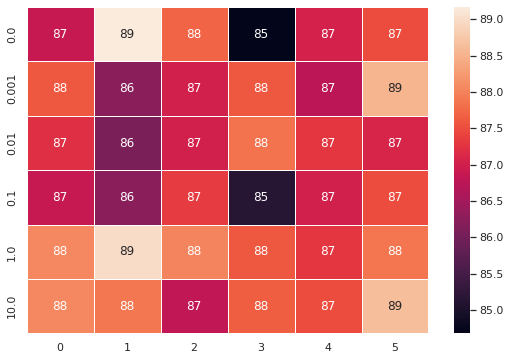

In [94]:
"""
Annotated heatmaps
==================

"""
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

# # Load the example flights dataset and conver to long-form
# flights_long = sns.load_dataset("flights")
# flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(test_acc_df, annot=True, linewidths=.5, ax=ax)

In [ ]:
array = 

In [61]:
"""
Discovering structure in heatmap data
=====================================

"""
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

seed  sparse   Test_Acc
0      0   0.001  86.884827
1      1   0.001  89.167939
2      2   0.001  87.696601
3      3   0.001  84.677829
4      4   0.001  87.037043
5      5   0.001  87.493660
6      0   0.010  87.595134
7      1   0.010  86.225262
8      2   0.010  87.011671
9      3   0.010  87.595134
10     4   0.010  86.757988
11     5   0.010  88.533740
12     0   0.100  87.214612
13     1   0.100  86.098424
14     2   0.100  87.011671
15     3   0.100  87.848811
16     4   0.100  87.290720
17     5   0.100  87.087773
18     0   0.000  86.884827
19     1   0.000  86.225262
20     2   0.000  87.341457
21     3   0.000  85.134453
22     4   0.000  87.011671
23     5   0.000  87.493660
24     0  10.000  88.051751
25     1  10.000  88.990364
26     2  10.000  88.026380
27     3  10.000  87.595134
28     4  10.000  87.290720
29     5  10.000  87.874176
30     0   1.000  88.051751
31     1   1.000  87.899541
32     2   1.000  86.808725
33     3   1.000  87.645864
34     4   1.000  87.493660
35     5   1.000  88.635207